In [1]:
import numpy as np
from glob import glob

import des_utils

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'

In [2]:
reload(des_utils)

<module 'des_utils' from 'des_utils.pyc'>

In [3]:
sim_files = glob("../ZD_KNDES_TEST/*DAT")
sim_triggers, sim_colors, sim_ifluxes,simdets = des_utils.extract_colors(sim_files)

des_utils.py:49: RuntimeWarning: invalid value encountered in log10
  colors[i] = -2.5*(np.log10(iflux1)-np.log10(zflux1))


In [4]:
print "{} triggers out of {} files".format(np.sum(sim_triggers), len(sim_triggers))
print simdets

679 triggers out of 1001 files
235


-1381.3838 1826.2722


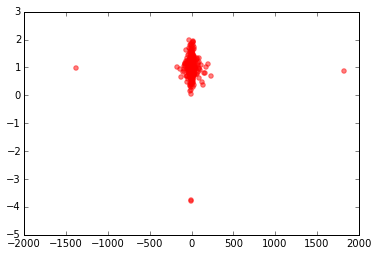

In [5]:
plt.scatter(sim_ifluxes[sim_triggers], sim_colors[sim_triggers], alpha=0.5, color='r')
print sim_ifluxes[sim_triggers].min(), sim_ifluxes[sim_triggers].max()
xlow, xhigh = plt.xlim()

In [6]:
data_files = glob("data/DESY1_numepoch1_iz_real_text/*.dat")
data_triggers, data_colors, data_ifluxes = des_utils.extract_colors(data_files)

des_utils.py:30: RuntimeWarning: invalid value encountered in greater_equal
  iSNRpass = iSNR >=5


(-2000.0, 2000.0)

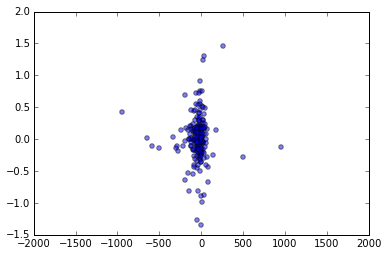

In [7]:
plt.scatter(data_ifluxes[data_triggers], data_colors[data_triggers], alpha=0.5)
plt.xlim(xlow, xhigh)

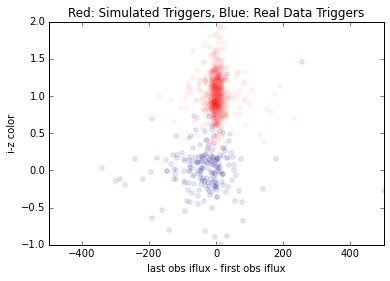

In [8]:
plt.scatter(data_ifluxes[data_triggers], data_colors[data_triggers], alpha=0.1)
plt.scatter(sim_ifluxes[sim_triggers], sim_colors[sim_triggers], alpha=0.05, color='r')
plt.xlim(-500, 500)
plt.ylim(-1, 2)
plt.title("Red: Simulated Triggers, Blue: Real Data Triggers")
plt.xlabel("last obs iflux - first obs iflux")
plt.ylabel("i-z color")